In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
from astropy.table import Table, vstack


In [5]:
kic = pd.read_csv("../stellarCatalogs/dr25_stellar_berger2019_clean_GK.txt")


In [6]:
dataLoc = "../../kepler-robovetter-master/"

# starlist = dataLoc + "dr25_stellar_updated_feh_" + stellarType + ".txt"

invFull = ascii.read(dataLoc + "kplr_dr25_inv_robovetter_input.txt");
scr1Full = ascii.read(dataLoc + "kplr_dr25_scr1_robovetter_input.txt");
scr2Full = ascii.read(dataLoc + "kplr_dr25_scr2_robovetter_input.txt");
scr3Full = ascii.read(dataLoc + "kplr_dr25_scr3_robovetter_input.txt");
inj1Full = ascii.read(dataLoc + "kplr_dr25_inj1_robovetter_input.txt");
inj2Full = ascii.read(dataLoc + "kplr_dr25_inj2_robovetter_input.txt");

invFullPd = invFull.to_pandas();
scr1FullPd = scr1Full.to_pandas();
scr2FullPd = scr2Full.to_pandas();
scr3FullPd = scr3Full.to_pandas();
inj1FullPd = inj1Full.to_pandas();
inj2FullPd = inj2Full.to_pandas();


In [7]:
invDropList = ascii.read("../data/kplr_droplist_inv.txt");
scr1DropList = ascii.read("../data/kplr_droplist_scr1.txt");
scr2DropList = ascii.read("../data/kplr_droplist_scr2.txt");
scr3DropList = ascii.read("../data/kplr_droplist_scr3.txt");
invDropList = invDropList.to_pandas();
scr1DropList = scr1DropList.to_pandas();
scr2DropList = scr2DropList.to_pandas();
scr3DropList = scr3DropList.to_pandas();

invTcesPd = invFullPd[~invFullPd['TCE_ID'].isin(invDropList['TCE_ID'])];
scr1TcesPd = scr1FullPd[~scr1FullPd['TCE_ID'].isin(scr1DropList['TCE_ID'])];
scr2TcesPd = scr2FullPd[~scr2FullPd['TCE_ID'].isin(scr2DropList['TCE_ID'])];
scr3TcesPd = scr3FullPd[~scr3FullPd['TCE_ID'].isin(scr3DropList['TCE_ID'])];


In [8]:
injectRecovered = np.genfromtxt("../data/DR25-Injected-Recovered-OnTarget-Planet-TCEs-1-1-Prat.txt", dtype='str')

injTces = inj1FullPd[np.in1d(inj1FullPd['TCE_ID'],injectRecovered)]
injBinaries = inj2FullPd;

In [9]:
invTces = Table.from_pandas(invTcesPd)
scr1Tces = Table.from_pandas(scr1TcesPd)
scr2Tces = Table.from_pandas(scr2TcesPd)
scr3Tces = Table.from_pandas(scr3TcesPd)

# create a final set of scrambled TCEs
scrTces = vstack([scr1Tces, scr2Tces, scr3Tces])
# scrTces = scr1Tces

print("length of scrTces = " + str(len(scrTces)))

length of scrTces = 36842


In [10]:
invTces = invTces[np.in1d(invTces['KIC'],kic.kepid)]
scrTces = scrTces[np.in1d(scrTces['KIC'],kic.kepid)]
print("length of invTces = " + str(len(invTces)))
print("length of scrTces = " + str(len(scrTces)))


length of invTces = 1014
length of scrTces = 3238


In [11]:
subSample = np.random.rand(len(scrTces))
# scrTcesSub = scrTces[subSample < 1./3]
scrTcesSub = scrTces
print("length of scrTcesSub = " + str(len(scrTcesSub)))

length of scrTcesSub = 3238


In [12]:
# syntheticTrueFps = vstack([invTces,scrTcesSub])
syntheticTrueFps = vstack([invTces,invTces,invTces,scrTcesSub])
print("length of syntheticTrueFps = " + str(len(syntheticTrueFps)))

length of syntheticTrueFps = 6280


In [25]:
from scipy import stats

ThreshLines = ['-', '--', ':', '-.'];
ThreshColors = ['kd', 'kx', 'ks', 'k+']
def data_in_range(d, r):
    return d[(d>r[0])&(d<r[1])]

def draw_rv_dists(colName, thresholds, dataRange):
    plt.figure(figsize=(8,4));
    nBins = 50
    plt.hist(data_in_range(syntheticTrueFps[colName],dataRange), nBins, color='k', alpha = 0.2);
    plt.hist(data_in_range(injTces[colName],dataRange), nBins, color='k', alpha = 1.0, histtype="step");
#     plt.hist(data_in_range(injBinaries[colName],dataRange), nBins, color='k', alpha = 0.5);
    ylim = plt.ylim()
    for i in range(len(thresholds)):
        plt.plot([thresholds[i],thresholds[i]], ylim, ThreshColors[i], ls=ThreshLines[i], alpha=0.6)
    plt.yscale('log')
    plt.xlim(dataRange);
    


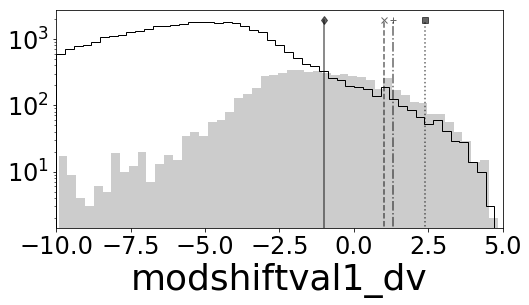

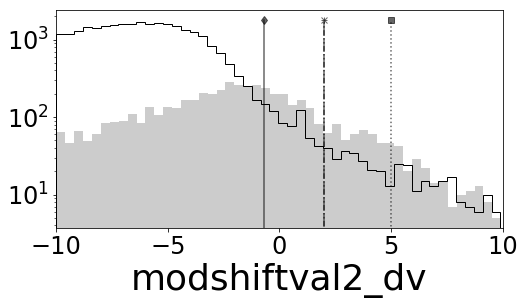

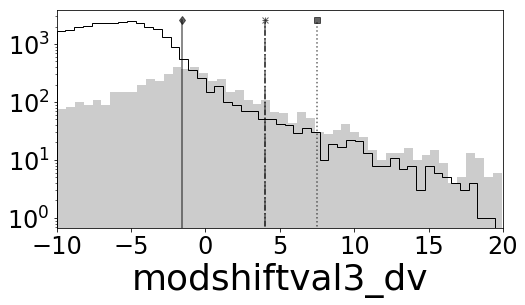

In [26]:
draw_rv_dists("modshiftval1_dv", [-1.0, 1.0, 2.4, 1.3], [-10,5])
plt.xlabel("modshiftval1_dv", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval1_dv.pdf", bbox_inches = "tight")
draw_rv_dists("modshiftval2_dv", [-0.7, 2.0, 5.0, 2.0], [-10,10])
plt.xlabel("modshiftval2_dv", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval2_dv.pdf", bbox_inches = "tight")
draw_rv_dists("modshiftval3_dv", [-1.6, 4.0, 7.5, 4.0], [-10,20])
plt.xlabel("modshiftval3_dv", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval3_dv.pdf", bbox_inches = "tight")


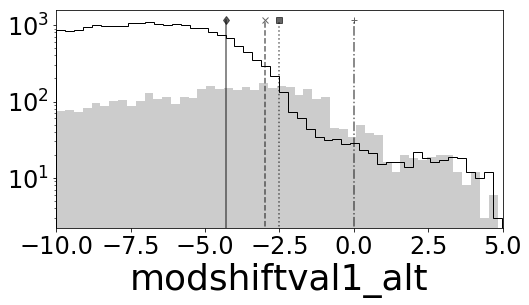

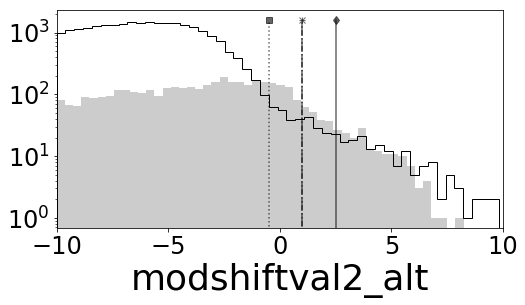

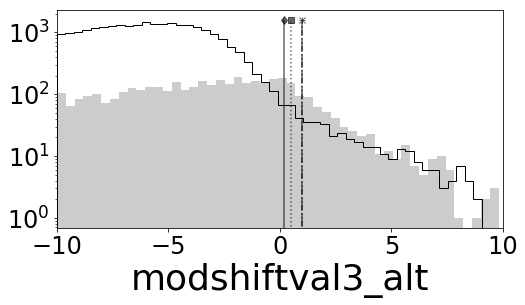

In [27]:
draw_rv_dists("modshiftval1_alt", [-4.3, -3.0, -2.5, 0.0], [-10,5])
plt.xlabel("modshiftval1_alt", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval1_alt.pdf", bbox_inches = "tight")
draw_rv_dists("modshiftval2_alt", [2.5, 1.0, -0.5, 1.0], [-10,10])
plt.xlabel("modshiftval2_alt", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval2_alt.pdf", bbox_inches = "tight")
draw_rv_dists("modshiftval3_alt", [0.2, 1.0, 0.5, 1.0], [-10,10])
plt.xlabel("modshiftval3_alt", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval3_alt.pdf", bbox_inches = "tight")


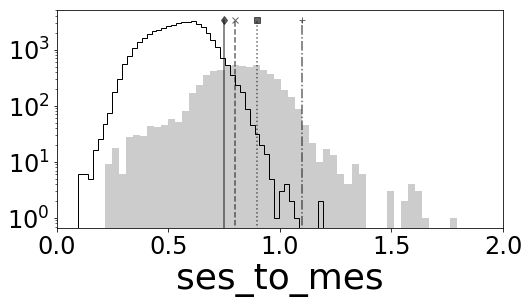

In [28]:
draw_rv_dists("ses_to_mes", [0.75, 0.8, 0.9, 1.1], [0,2])
plt.xlabel("ses_to_mes", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/ses_to_mes.pdf", bbox_inches = "tight")


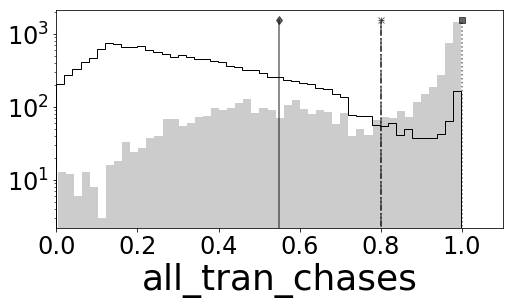

In [29]:
draw_rv_dists("all_tran_chases", [0.55, 0.8, 1.0, 0.8], [0,1.1])
plt.xlabel("all_tran_chases", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/all_tran_chases.pdf", bbox_inches = "tight")


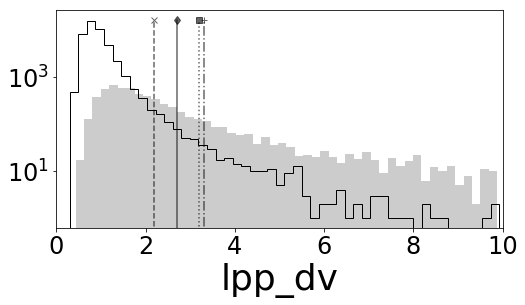

In [30]:
draw_rv_dists("lpp_dv", [2.7, 2.2, 3.2, 3.3], [0,10])
plt.xlabel("lpp_dv", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/lpp_dv.pdf", bbox_inches = "tight")


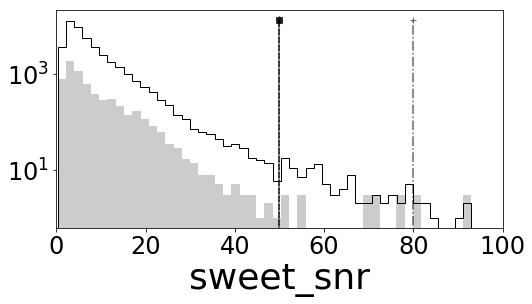

In [31]:
draw_rv_dists("sweet_snr", [50.0, 50.0, 50.0, 80.0], [0,100])
plt.xlabel("sweet_snr", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/sweet_snr.pdf", bbox_inches = "tight")


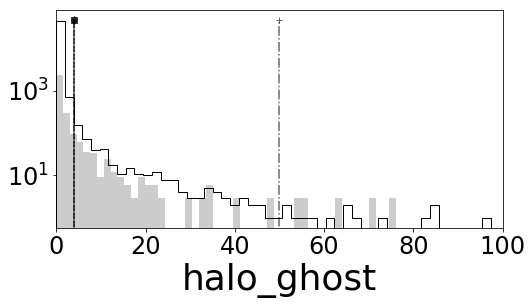

In [32]:
draw_rv_dists("halo_ghost", [4.0, 4.0, 4.0, 50.0], [0,100])
plt.xlabel("halo_ghost", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/halo_ghost.pdf", bbox_inches = "tight")


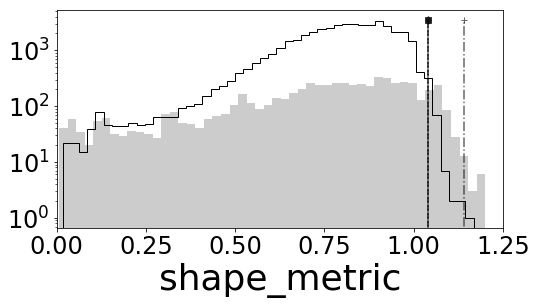

In [33]:
draw_rv_dists("shape_metric", [1.04, 1.04, 1.04, 1.14], [0,1.25])
plt.xlabel("shape_metric", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/shape_metric.pdf", bbox_inches = "tight")


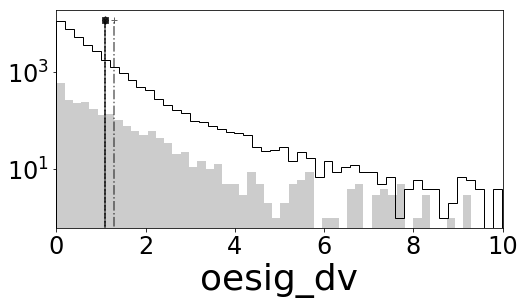

In [34]:
draw_rv_dists("oesig_dv", [1.1, 1.1, 1.1, 1.3], [0,10])
plt.xlabel("oesig_dv", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/oesig_dv.pdf", bbox_inches = "tight")


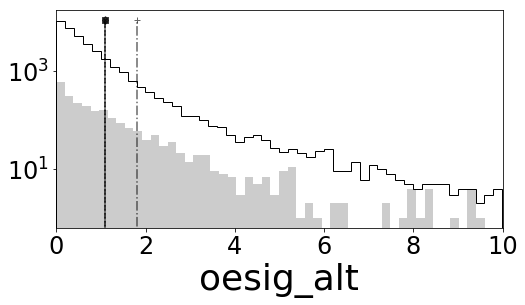

In [35]:
draw_rv_dists("oesig_alt", [1.1, 1.1, 1.1, 1.8], [0,10])
plt.xlabel("oesig_alt", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/oesig_alt.pdf", bbox_inches = "tight")


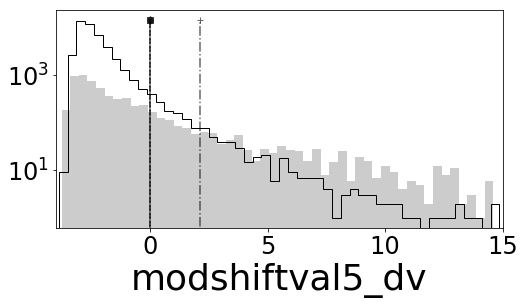

In [36]:
draw_rv_dists("modshiftval5_dv", [0, 0, 0, 2.1], [-4,15])
plt.xlabel("modshiftval5_dv", fontSize = 36)
plt.tick_params(labelsize = 24)
plt.savefig("rvFigures/modshiftval5_dv.pdf", bbox_inches = "tight")


In [16]:
list(injTces)

['Data_Set',
 'TCE_ID',
 'KIC',
 'pn',
 'n_plan',
 'ntrans',
 'nrealt',
 'ngoodt',
 'iflag0',
 'iflag1',
 'iflag2',
 'iflag3',
 'iflag4',
 'iflag5',
 'cflag0',
 'cflag1',
 'cflag2',
 'cflag3',
 'cflag4',
 'cflag5',
 'cflag6',
 'cflag7',
 'cflag8',
 'ephem_disp',
 'cent_disp',
 'cent_score',
 'period',
 'period_err',
 'epoch',
 'epoch_err',
 'duration',
 'duration_err',
 'impact',
 'impact_err',
 'depth',
 'depth_err',
 'depth_alt',
 'sma',
 'rstar',
 'mes',
 'ses_to_mes',
 'new_mes',
 'lpp_dv',
 'lpp_alt',
 'all_tran_chases',
 'sweet_snr',
 'sweet_amp',
 'shape_metric',
 'halo_ghost',
 'mod_sig_pri_dv',
 'mod_sig_sec_dv',
 'mod_sig_ter_dv',
 'mod_sig_pos_dv',
 'mod_fred_dv',
 'mod_fa1_dv',
 'mod_fa2_dv',
 'mod_sig_pri_alt',
 'mod_sig_sec_alt',
 'mod_sig_ter_alt',
 'mod_sig_pos_alt',
 'mod_fred_alt',
 'mod_fa1_alt',
 'mod_fa2_alt',
 'modshiftval1_dv',
 'modshiftval2_dv',
 'modshiftval3_dv',
 'modshiftval4_dv',
 'modshiftval5_dv',
 'modshiftval6_dv',
 'modshiftval1_alt',
 'modshiftval2_a